In [11]:
from src.image_loaders import AerialCarsImageLoader
import cv2
import matplotlib.pyplot as plt
import numpy as np

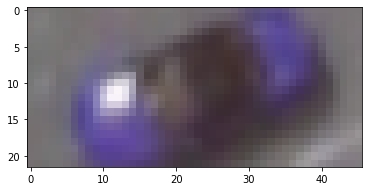

In [5]:
aerialCarsImageLoader = AerialCarsImageLoader()

image = aerialCarsImageLoader.load_image(
    '../data/raw/aerial-cars-dataset/MOS75.png',
    '../data/raw/aerial-cars-dataset/MOS75.txt'
)

car = image.get_car(image.bnd_boxes[7])

plt.imshow(car)

### HOG

In [8]:
# winSize = (64,64)
# blockSize = (16,16)
# blockStride = (8,8)
# cellSize = (8,8)
# nbins = 9
# derivAperture = 1
# winSigma = 4.
# histogramNormType = 0
# L2HysThreshold = 2.0000000000000001e-01
# gammaCorrection = 0
# nlevels = 64
# hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
#                         histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
# #compute(img[, winStride[, padding[, locations]]]) -> descriptors
# winStride = (8,8)
# padding = (8,8)
# locations = ((10,20),)
# hist = hog.compute(car,winStride,padding,locations)

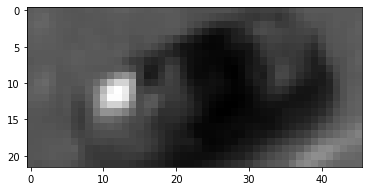

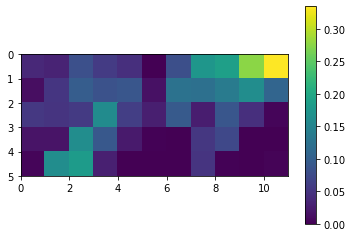

In [14]:
# source
# https://stackoverflow.com/questions/6090399/get-hog-image-features-from-opencv-python

img = cv2.cvtColor(car,
                   cv2.COLOR_BGR2GRAY)

cell_size = (4, 4)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Preview
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

### Local binary patterns

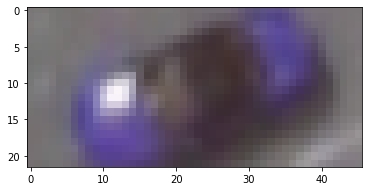

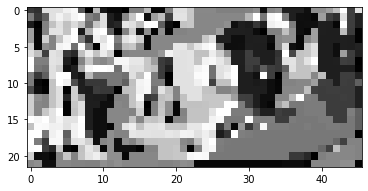

In [16]:
# source
# https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/

def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # Exception is required when  
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass
      
    return new_value 
   
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 
       
    # Now, we need to convert binary 
    # values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 
   
img_bgr = car
   
height, width, _ = img_bgr.shape 
   
# We need to convert RGB image  
# into gray one because gray  
# image has one channel only. 
img_gray = cv2.cvtColor(img_bgr, 
                        cv2.COLOR_BGR2GRAY) 
   
# Create a numpy array as  
# the same height and width  
# of RGB image 
img_lbp = np.zeros((height, width), 
                   np.uint8) 
   
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 
  
plt.imshow(img_bgr) 
plt.show() 
   
plt.imshow(img_lbp, cmap ="gray") 
plt.show() 